In [7]:
from misc import draw_small_world
from multiprocessing import Pool
import numpy as np
from graph import SmallWorld
from viz import draw_data
from utils import Timer
from engine import fun
import jupyternotify
import time
ip = get_ipython()
ip.register_magics(jupyternotify.JupyterNotifyMagics)

<IPython.core.display.Javascript object>

In [8]:
%%notify
time.sleep(5)

<IPython.core.display.Javascript object>

In [7]:
czs = dict()

In [3]:
n = 1000
k = 10
alphas = np.arange(0.08, 0.12, .01)
bs = np.arange(2, 10, .2)
T = 50
TAIL = 25
graph.average_degree()

20.0

In [4]:
p = Pool(32)
cz = []
I = 25
beta = .9
timer = Timer()
for _ in range(I):
    graph = SmallWorld(n, k, beta)
    cz.append(p.map(fun, [(graph, b, alpha, T) for alpha in alphas for b in bs]))
timer.print_elapsed()
czs[beta] = cz

time elapsed = 525.7561597824097


NameError: name 'czs' is not defined

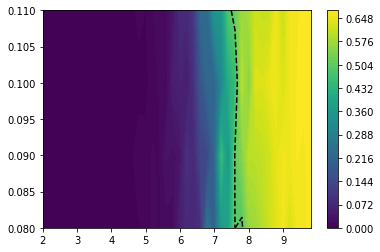

In [5]:
ts = []
for c in cz:
    ts.append(list(map(np.mean, map(lambda x:x[-TAIL:], c))))

ts = np.array(ts)
ts = np.mean(ts, axis=0)
ts.shape
draw_data(bs, alphas, ts, levels=[.5, .7, .9])

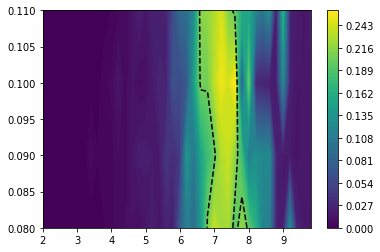

In [6]:
ts = []
for c in cz:
    ts.append(list(map(np.mean, map(lambda x:x[-TAIL:], c))))

ts = np.array(ts)
ts = np.std(ts, axis=0)
ts.shape
draw_data(bs, alphas, ts, levels=[.2])

In [36]:

czs[.7] = cz

In [14]:
print('\a')




In [ ]:
TAIL = 5
def averager(c):
    return list(map(np.mean(t[-TAIL:]), c))
tz = list(map(averager, cz))
